In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
import numpy as np

# Load the text file containing the sentences.

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [78]:
lines = []
with open('/content/drive/MyDrive/sentiment labelled sentences/imdb_labelled.txt') as theFile1:
  for y in theFile1:
        lines.append(y.rstrip('\n'))
print(len(lines))
with open('/content/drive/MyDrive/sentiment labelled sentences/amazon_cells_labelled.txt') as theFile2:
  for y in theFile2:
        lines.append(y.rstrip('\n'))
print(len(lines))
with open('/content/drive/MyDrive/sentiment labelled sentences/yelp_labelled.txt') as theFile3:
    for y in theFile3:
        lines.append(y.rstrip('\n'))
print(len(lines))
print(lines[0])

# Create empty lists to store sentences and labels
sentences = []
labels = []

# Separate sentences and labels
sentences, labels = zip(*[line.split('\t') for line in lines])

print(sentences[0])
print(labels[0])


1000
2000
3000
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
0


# Write a script to collect all the words and put them on a list.

In [79]:

allWords=[]
for x in sentences:
    wx=x.split(' ')
    for i in wx:
        allWords.append(i)

print(allWords)
print(len(allWords))

['A', 'very,', 'very,', 'very', 'slow-moving,', 'aimless', 'movie', 'about', 'a', 'distressed,', 'drifting', 'young', 'man.', '', '', 'Not', 'sure', 'who', 'was', 'more', 'lost', '-', 'the', 'flat', 'characters', 'or', 'the', 'audience,', 'nearly', 'half', 'of', 'whom', 'walked', 'out.', '', '', 'Attempting', 'artiness', 'with', 'black', '&', 'white', 'and', 'clever', 'camera', 'angles,', 'the', 'movie', 'disappointed', '-', 'became', 'even', 'more', 'ridiculous', '-', 'as', 'the', 'acting', 'was', 'poor', 'and', 'the', 'plot', 'and', 'lines', 'almost', 'non-existent.', '', '', 'Very', 'little', 'music', 'or', 'anything', 'to', 'speak', 'of.', '', '', 'The', 'best', 'scene', 'in', 'the', 'movie', 'was', 'when', 'Gerardo', 'is', 'trying', 'to', 'find', 'a', 'song', 'that', 'keeps', 'running', 'through', 'his', 'head.', '', '', 'The', 'rest', 'of', 'the', 'movie', 'lacks', 'art,', 'charm,', 'meaning...', 'If', "it's", 'about', 'emptiness,', 'it', 'works', 'I', 'guess', 'because', "it's",

# Collect the unique words.

In [80]:
uniqueWords=set(allWords)

print(uniqueWords)
vocabSize=len(uniqueWords)
print(vocabSize)

uW=list(uniqueWords)
print(uW)
print(uW[:5])

sorteduW = sorted(uW)
print(sorteduW)

{'', 'facial', 'read', 'supernatural', 'options.', 'kidnapped', 'dropped', 'slurs', 'hours', 'ford', 'tension', 'Initially', 'mall', 'ends.', 'intelligence,', '(for', 'terrible.....', 'fluffy,', 'playing.', 'phones', 'bad,', 'Absolutel', 'sexy', 'moments.', 'wontons', 'customize', "Anne's", 'Shakespear,', 'rate', 'eighth', 'nicely', 'NOW!', 'More.', 'Saw', 'type', 'theory', 'youtube.', 'HAD', 'Lemon', 'Phoenix', 'en', 'villains', 'convincing', 'results,', 'Plater.', 'crocs', 'start', 'saying.', 'him,', 'banana', 'liking', 'intense', 'director.', 'performed.', "Girl'", 'truly', 'fill', 'airline', 'expecting', '10/10', 'smudged', 'and/or', 'copier', 'station.', 'funny,', 'creates', 'surf', 'Very', 'install', 'work', 'Stopped', 'data', 'As', 'gristle', 'Ryan', 'Host', 'narration', 'realistic.', 'next.', 'rather,', 'son', 'Malta', 'bruschetta', 'waited.', 'spot', 'fan', 'shut-down', 'line,', 'unacceptable.', 'strangers', 'decision.', 'hereas', 'taco', 'frequently4.', 'girl', 'fav', 'poler'

# Tokenize Sentences and Prepare Data for Model Training.

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create DataFrame
data = {'Words': list(uniqueWords)}
word_df = pd.DataFrame(data)

# Use LabelEncoder to perform integer encoding on words
word_label_encoder = LabelEncoder()
word_df['Word_encoded'] = word_label_encoder.fit_transform(word_df['Words'])

# Display the DataFrame for encoded words
print(word_df)

# Create a DataFrame for sentences
sentence_df = pd.DataFrame({'Sentences': sentences})

# Tokenize the sentences into words
sentence_df['Tokenized_Sentences'] = sentence_df['Sentences'].apply(lambda sentence: sentence.split())

# Use the encoded words to encode the sentences
sentence_df['Sentences_encoded'] = sentence_df['Tokenized_Sentences'].apply(
    lambda tokens: [word_label_encoder.transform([word])[0] for word in tokens]
)

# Display the final DataFrame
print(sentence_df['Sentences_encoded'])

             Words  Word_encoded
0                              0
1           facial          3859
2             read          6164
3     supernatural          7090
4         options.          5596
...            ...           ...
8013          Lane          1110
8014     cheerfull          2801
8015   Koteas,Jack          1094
8016          geek          4206
8017         wrap,          7957

[8018 rows x 2 columns]
0       [300, 7651, 7651, 7650, 6773, 2056, 5348, 1944...
1       [1290, 7097, 7838, 7738, 5326, 5054, 178, 7227...
2       [396, 2204, 7880, 2446, 85, 7835, 2120, 2880, ...
3        [1824, 5014, 5380, 5597, 2149, 7339, 6861, 5530]
4       [1715, 2409, 6482, 4647, 7227, 5348, 7738, 782...
                              ...                        
2995    [995, 7268, 4076, 6671, 4411, 4025, 2120, 7215...
2996                                    [380, 4715, 4270]
2997    [1333, 995, 7738, 5484, 4636, 2120, 7947, 5484...
2998    [1715, 7843, 3819, 7738, 7520, 2120, 995, 7268...

# Set sentence length

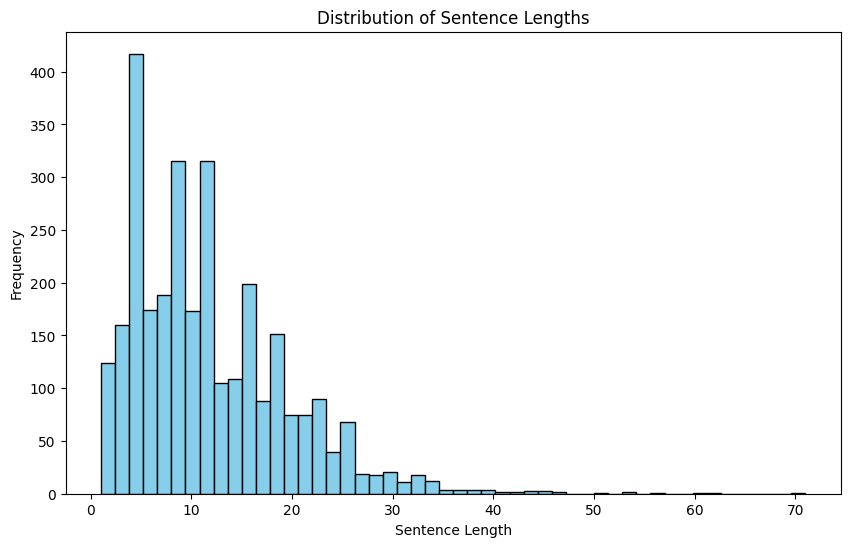

In [82]:
import matplotlib.pyplot as plt

# Assuming sentence_df has a column 'Sentences_encoded' with lists of encoded sentences
sentence_df['SentenceLength'] = sentence_df['Sentences_encoded'].apply(len)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_df['SentenceLength'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [83]:
max_sentence_length = sentence_df['Sentences_encoded'].apply(len).max()
print("Maximum sentence length:", max_sentence_length)

Maximum sentence length: 71


# Pad the sequences based on the max sentence length

In [84]:
from torch.nn.utils.rnn import pad_sequence

# Assuming labels are binary (0 or 1)
labels = [int(label) for label in labels]
# Convert labels to a NumPy array and then to a PyTorch tensor
t = torch.tensor(labels, dtype=torch.float32)

max_length = max_sentence_length

# Pad sequences using PyTorch's pad_sequence
padded_sequences = pad_sequence([torch.tensor(seq) for seq in sentence_df['Sentences_encoded']], batch_first=True, padding_value=0)

# Truncate or pad to the specified max_length
padded_sequences = padded_sequences[:, :max_length]

# Convert to NumPy array
x = padded_sequences.numpy()

# Print the results
print(x)

print(t[0:2].numpy())
print(x[0:2])





[[ 300 7651 7651 ...    0    0    0]
 [1290 7097 7838 ...    0    0    0]
 [ 396 2204 7880 ...    0    0    0]
 ...
 [1333  995 7738 ...    0    0    0]
 [1715 7843 3819 ...    0    0    0]
 [1718 2209 4614 ...    0    0    0]]
[0. 0.]
[[ 300 7651 7651 7650 6773 2056 5348 1944 1938 3455 3530 8000 5127    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [1290 7097 7838 7738 5326 5054  178 7227 4021 2757 5597 7227 2251 5415
  4364 5528 7845 7716 5626    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]]


# Prepare Input Vectors and Targets for Training.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

xx, tt = shuffle(x, t)

# Split the training and testing sets.

In [86]:
train_data, test_data, train_labels, test_labels = train_test_split(xx, tt, test_size=0.2)


# Model

In [106]:
import torch.nn.functional as F

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        attention_weights = F.softmax(self.linear(x), dim=1)
        attended_output = torch.bmm(attention_weights.permute(0, 2, 1), x)
        return attended_output.squeeze(1)

class LSTMAutoencoderAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, lstm_units):
        super(LSTMAutoencoderAttention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm1 = nn.LSTM(embedding_dim, lstm_units, batch_first=True)
        self.lstm2 = nn.LSTM(lstm_units, lstm_units, batch_first=True)
        self.lstm3 = nn.LSTM(lstm_units, lstm_units, batch_first=True)
        self.attention = AttentionLayer(lstm_units)
        self.fc = nn.Linear(lstm_units, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out1, _ = self.lstm1(embedded)
        lstm_out2, _ = self.lstm2(lstm_out1)
        lstm_out3, _ = self.lstm3(lstm_out2)

        # Attention mechanism
        attended_output = self.attention(lstm_out3)

        output = self.fc(attended_output)
        output = self.sigmoid(output)
        return output

# Define the model
vocab_size = len(uniqueWords)
embedding_dim = 200
lstm_units = 50

model_attention = LSTMAutoencoderAttention(vocab_size, embedding_dim, lstm_units)

# Print the model summary
print(model_attention)

LSTMAutoencoderAttention(
  (embedding): Embedding(8018, 200)
  (lstm1): LSTM(200, 50, batch_first=True)
  (lstm2): LSTM(50, 50, batch_first=True)
  (lstm3): LSTM(50, 50, batch_first=True)
  (attention): AttentionLayer(
    (linear): Linear(in_features=50, out_features=1, bias=True)
  )
  (fc): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


#Training the model

In [107]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_attention.parameters(), lr=0.001)

# Convert training data and labels to PyTorch tensors
x_train_tensor = torch.tensor(train_data, dtype=torch.long)
t_train_tensor = torch.tensor(train_labels, dtype=torch.float32)

# Training loop
epochs = 40
batch_size = 16

for epoch in range(epochs):
    model_attention.train()
    for i in range(0, len(x_train_tensor), batch_size):
        batch_x = x_train_tensor[i:i + batch_size]
        batch_t = t_train_tensor[i:i + batch_size]

        optimizer.zero_grad()
        output = model_attention(batch_x)
        loss = criterion(output.squeeze(), batch_t)
        loss.backward()
        optimizer.step()

# Evaulating the model

In [94]:
# Convert test data and labels to PyTorch tensors
x_test_tensor = torch.tensor(test_data, dtype=torch.long)
t_test_tensor = torch.tensor(test_labels, dtype=torch.float32)

# Switch the model to evaluation mode
model_attention.eval()

# Disable gradient computation for evaluation
with torch.no_grad():
    # Forward pass on the test set
    outputs = model_attention(x_test_tensor)

    # Convert the output to binary predictions (0 or 1)
    predicted_labels = (outputs.squeeze().numpy() > 0.5).astype(float)

    # Compute accuracy
    accuracy = np.mean(predicted_labels == t_test_tensor.numpy())

print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9426666666666667


# Check model predictions

In [121]:
tensor = torch.tensor(xx, dtype=torch.long)
with torch.no_grad():
    # Forward pass on the test set
    outputs = model_attention(tensor)

    # Convert the output to binary predictions (0 or 1)
    predicted_labels = (outputs.squeeze().numpy() > 0.5).astype(float)
for i in range(10):
    sentence = sentences[i]
    true_label = int(labels[i])  # Assuming true labels are integers
    predicted_label = int(predicted_labels[i].item())

    print(f"Sentence: {sentence}")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")
    print("\n")

Sentence: A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  
True Label: 0
Predicted Label: 0


Sentence: Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  
True Label: 0
Predicted Label: 0


Sentence: Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  
True Label: 0
Predicted Label: 0


Sentence: Very little music or anything to speak of.  
True Label: 0
Predicted Label: 1


Sentence: The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  
True Label: 1
Predicted Label: 1


Sentence: The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  
True Label: 0
Predicted Label: 1


Sentence: Wasted two hours.  
True Label: 0
Predicted Label: 0


Sentence: Saw the m